# Task6 Prediction Using Decision Tree Algorithm

# Submitted By -Anjali Ruprela 
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import datasets

In [3]:

#way1
iris = datasets.load_iris()
#way2
data = pd.read_csv("Iris.csv")
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica
21,22,5.1,3.7,1.5,0.4,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Visualize Decision Tree

Text(0.5, 1.0, 'scatter')

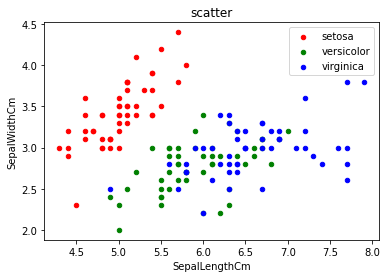

In [6]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

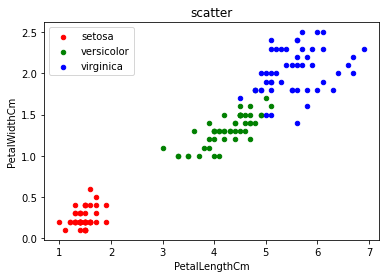

In [7]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

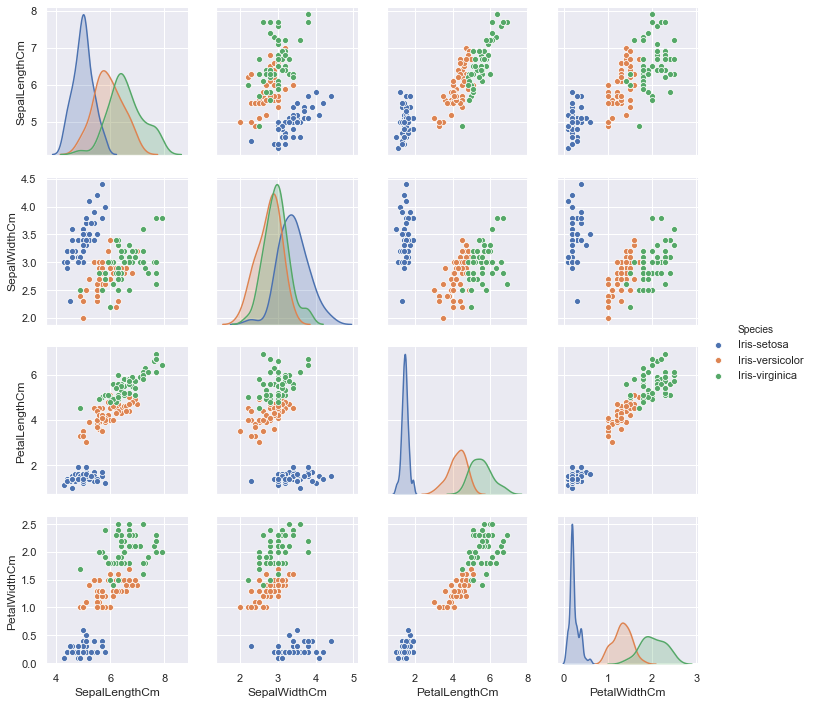

In [8]:
sns.set()
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")

In [17]:
x=data.iloc[:,1:5].values
y = data['Species'].values


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
pred = clf.predict(X_test)

df = pd.DataFrame({"Orignal":y_test,'Predicted':pred})

In [21]:
df

,Orignal,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [25]:
acc = accuracy_score(y_test, pred)

print('We got an accuracy score of : {} %'.format(acc*100))

print('\n CONFUSION MATRIX :')


We got an accuracy score of : 100.0 %

 CONFUSION MATRIX :


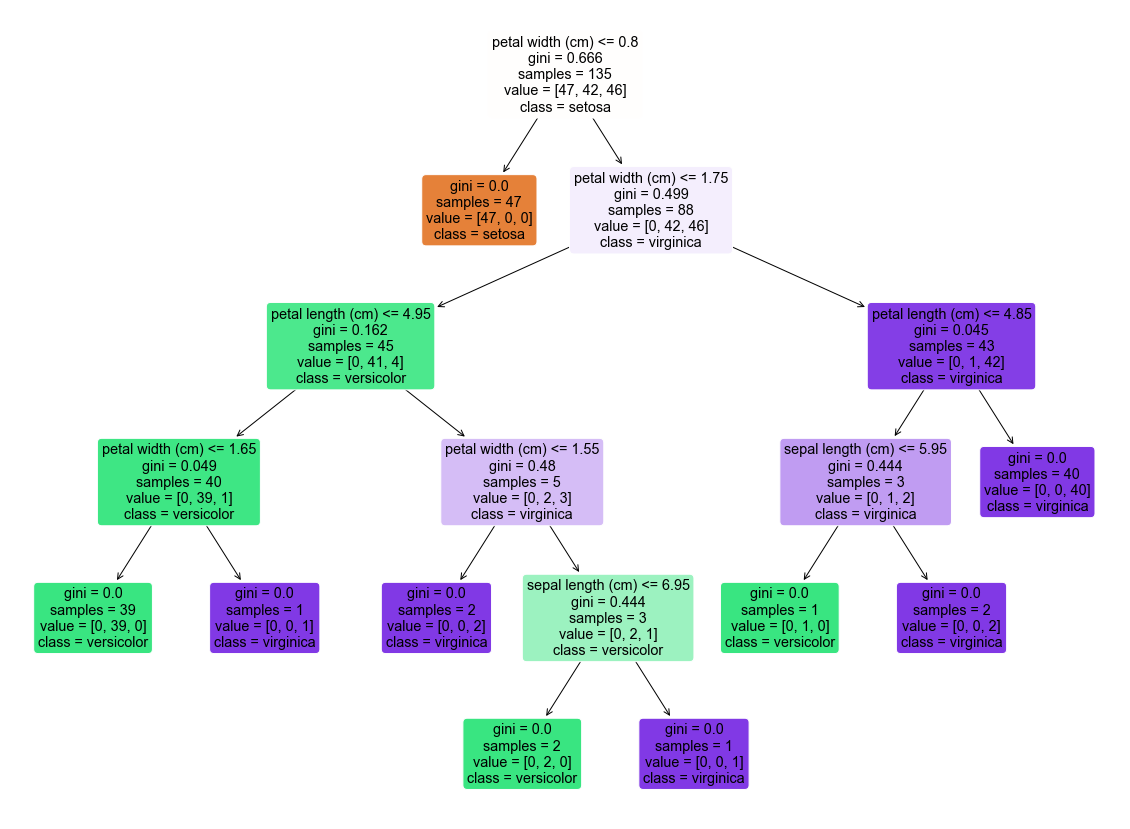

In [23]:
fig = plt.figure(figsize=(20,15))
plt.style.use('dark_background')
matplotlib.rcParams['text.color'] = 'black'
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,rounded=True, filled=True)